In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import itertools
%matplotlib inline

In [3]:
TW_data = pd.read_csv("/content/drive/MyDrive/Abhishek/credit default keras/Copy of creditcarddefault.csv")

In [4]:
TW_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# removing the customer id and name and saving the dependent varaibles 1n x
x = TW_data.iloc[:,1:24].values #.values converts a DF to ndarray

# saving the independent variable in y
y = TW_data.iloc[:,24].values

print(x)
print(y)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]
[1 1 0 ... 1 1 1]


In [6]:
# Splitting the data set into train and test using train_test_split library for cross validation

from sklearn.model_selection import train_test_split

# splitting the data in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 111)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


In [7]:
# scaling the data using the preprocessing library 
#Do splitting first and then preprocessing like standarization, one-hot-encoding etc to avoid data leakage
#The exact same transformer should be used in val, test as well as future unseen data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #Instantiation
x_train = sc.fit_transform(x_train) #Fitting and transformation
x_test = sc.transform(x_test)

In [8]:
x_train[:1]

array([[ 0.48238852,  0.81447304,  0.18907673,  0.86211952, -0.48921975,
        -0.87463676, -0.72347864, -0.6983838 , -0.66637051,  0.23416564,
         0.25233359, -0.63042993, -0.63367788, -0.6645842 , -0.51248219,
        -0.57038965,  0.39521137, -0.0821721 , -0.22758026,  0.33473587,
        -0.28260403,  3.38918769, -0.15149706]])

MODEL BUILDING USING KERAS

We have so far understood the data and made some preprocessing on the data in order to make the data suitable for our model. Now that our data is ready to be trained let us build our first Keras model.

We are here using a sequential model from the Keras as the data is simple.

In [9]:
# Importing the required modules from keras

from keras.models import Sequential
from keras.layers import Dense #Dense is a type of neural layer where 

In [10]:
# STEP 1:  initializing our model
class_model_keras = Sequential()

In [11]:
# 1st HIDDEN LAYER
class_model_keras.add(Dense(input_dim = 23, units = 12, activation = 'relu'))

# 2nd Hidden Layer 
# as the input dim to this layer is the output from the previous layer 
# we need not explicitly specify it here
class_model_keras.add(Dense(units = 12, activation = 'relu'))

# OUTPUT LAYER
# sigmoid activation is used to get the outout between 0 and 1.
class_model_keras.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
class_model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                288       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


In [13]:
# STEP 3: COMPILING THE NEURAL NETWORK
# In this step we have the liberty to choose the optimization method we would like to use 
# the loss fucntion and the metrics that we require ad outpur
# binary_crossentropy loss function used when a binary output is expected

class_model_keras.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# STEP 4: FITTING/Training THE MODEL

a =class_model_keras.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_split =0.1)

Epoch 1/100
1890/1890 [==============================] - 9s 3ms/step - loss: 0.5040 - accuracy: 0.7853 - val_loss: 0.4699 - val_accuracy: 0.8095
Epoch 2/100
1890/1890 [==============================] - 6s 3ms/step - loss: 0.4565 - accuracy: 0.8084 - val_loss: 0.4586 - val_accuracy: 0.8133
Epoch 3/100
1890/1890 [==============================] - 6s 3ms/step - loss: 0.4485 - accuracy: 0.8126 - val_loss: 0.4508 - val_accuracy: 0.8195
Epoch 4/100
1890/1890 [==============================] - 6s 3ms/step - loss: 0.4448 - accuracy: 0.8145 - val_loss: 0.4451 - val_accuracy: 0.8267
Epoch 5/100
1890/1890 [==============================] - 6s 3ms/step - loss: 0.4426 - accuracy: 0.8159 - val_loss: 0.4449 - val_accuracy: 0.8210
Epoch 6/100
1890/1890 [==============================] - 6s 3ms/step - loss: 0.4407 - accuracy: 0.8162 - val_loss: 0.4425 - val_accuracy: 0.8229
Epoch 7/100
1890/1890 [==============================] - 6s 3ms/step - loss: 0.4397 - accuracy: 0.8159 - val_loss: 0.4397 - val_ac

In [15]:
# STEP 5: PREDICTING THE RESULTS FOR TEST DATA

y_pred =  class_model_keras.predict(x_test)

In [16]:
y_pred.shape, y_test.shape

((9000, 1), (9000,))

In [17]:
# As the values are the probabality we may need to set up a threshold to find the actual values

pred = (y_pred> 0.5) # returs the boolean format

In [18]:
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [31]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f68a6d18450>)

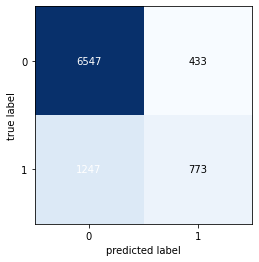

In [32]:
# Formulating the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plot_confusion_matrix(cm)


In [33]:
# Evaluating the Model

scores = class_model_keras.evaluate(x_test,y_test)

print("\nACCURACY: %.2f%%" % (scores[1]*100))

282/282 [==============================] - 2s 6ms/step - loss: 0.4403 - accuracy: 0.8133

ACCURACY: 81.33%
